# Import necessary libraries

In [12]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# Data processing

In [13]:
df = pd.read_csv('/home/khangpt/MUSIC-GEN-PROJ/music_crawler/Dataset.csv')
def preprocess_(df):
    X = df.drop(['label'], axis = 1)
    y = df['label']

    df.label = pd.Categorical(df.label)
    y = np.array(df.label.cat.codes)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X, y
X, y = preprocess_(df)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

# Config the svm model

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

svc = svm.SVC()

# Define the parameter distributions
param_dist = {
    'C': np.linspace(5.1,15,10),  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto'],  
}

# Create RandomizedSearchCV object
random_search = GridSearchCV(svc, param_dist, cv=3, scoring='accuracy')

# Fit the randomized search object to find the best parameters
random_search.fit(X,y)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [28]:
print(accuracy_score(random_search.predict(X_test), y_test))

0.745


Best value of C is lying from 10 to 15

In [15]:
# Create an SVM object with a rbf kernel
clf = svm.SVC(kernel='rbf', gamma='scale', C=11)

# Fit the model to the training data (X_train contains the features and y_train contains the genre labels)
clf.fit(X_train, y_train)

# Use the trained model to predict the genre labels of the test data
y_pred = clf.predict(X_test)

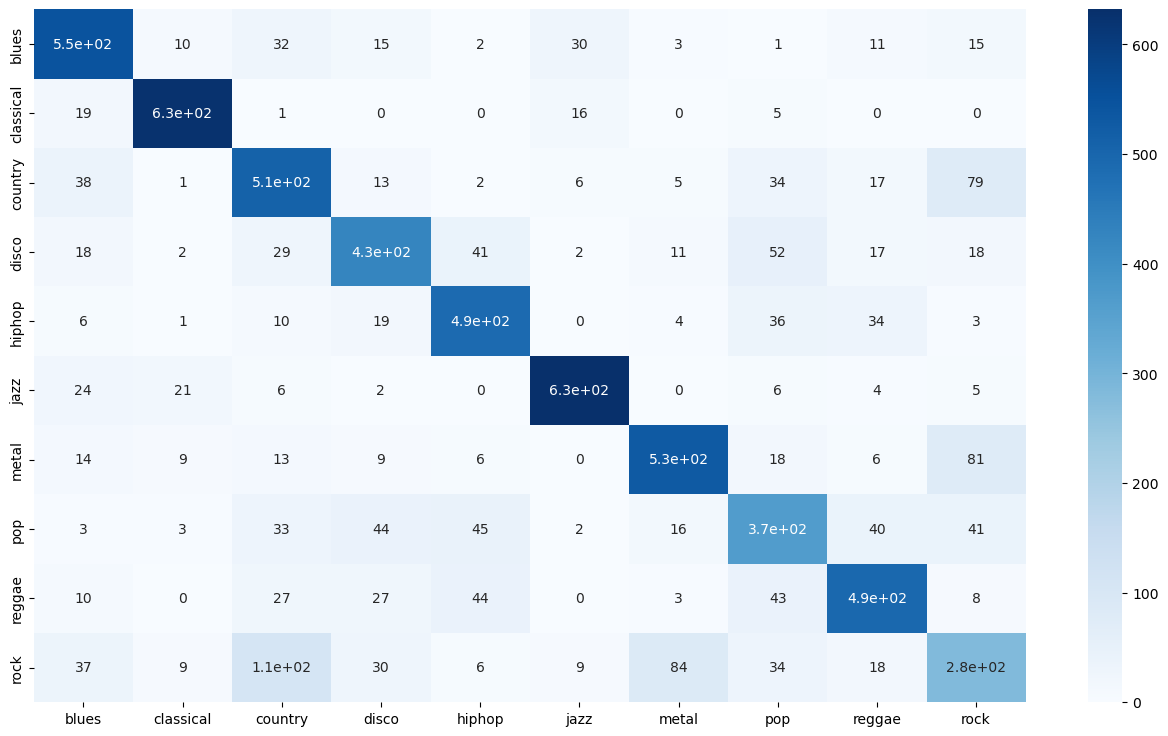

In [16]:
# Plot a confusion matrix to visualize how well the model is performing
preds = clf.predict(X_test)

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap='Blues',annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [17]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       667
           1       0.92      0.94      0.93       667
           2       0.66      0.72      0.69       706
           3       0.73      0.69      0.71       617
           4       0.77      0.81      0.79       602
           5       0.91      0.90      0.90       700
           6       0.81      0.77      0.79       685
           7       0.62      0.62      0.62       593
           8       0.77      0.75      0.76       656
           9       0.53      0.46      0.49       621

    accuracy                           0.75      6514
   macro avg       0.75      0.75      0.75      6514
weighted avg       0.75      0.75      0.75      6514



In [18]:
import os 
import pickle

if os.path.exists('../saved_model/svm_model.pkl'):
    os.remove('../saved_model/svm_model.pkl')
with open('../saved_model/svm_model.pkl','wb') as file:
    pickle.dump(clf, file)